In [ ]:
!pip install sovai[full]

## Box Office Movies

In [1]:
import sovai as sov
sov.token_auth(token="visit https://sov.ai/profile for your token")

#### Processed Dataset

In [3]:
df_movies = sov.data("movies/boxoffice")

In [4]:
df_movies.sort_values("date")

,ticker,date,title,distributor,gross,percent_yd,percent_lw,theaters,per_theater,total_gross,days_in_release,parent company,distributor address,distributorwebsite,release_date
191061,WBD,1997-07-01,Head Above Water,Fine Line,1588,-0.130,0.000,10.000,159.000,20425,7,Warner Bros. Discovery,"Burbank, California, United States",None,1997-06-24
8352,CMCSA,1997-07-01,The Lost World: Jurassic …,Universal,681480,-0.100,-0.350,2607.000,261.000,214658249,40,Comcast Corporation,"10 Universal City Plaza, Universal City, Calif...",https://www.universalpictures.com///,1997-05-22
165452,SONY,1997-07-01,My Best Friend's Wedding,Sony Pictures,2320386,0.010,-0.310,2134.000,1087.000,53842818,12,Sony Corporation,"10202 West Washington Boulevard, Culver City, ...",https://www.sonypictures.com/,1997-06-19
165451,SONY,1997-07-01,Men in Black,Sony Pictures,4815427,0.000,0.000,0.000,0.000,4815427,0,Sony Corporation,"10202 West Washington Boulevard, Culver City, ...",https://www.sonypictures.com/,1997-07-01
165450,SONY,1997-07-01,The Fifth Element,Sony Pictures,42025,-0.320,-0.710,662.000,63.000,60756457,54,Sony Corporation,"10202 West Washington Boulevard, Culver City, ...",https://www.sonypictures.com/,1997-05-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162739,Private,2024-08-11,Cuckoo,Neon,712500,-0.250,0.000,1503.000,474.000,3012500,3,30WEST,"New York City, New York, U.S.",http://neonrated.com/,2024-08-08
162735,Private,2024-08-11,Sing Sing,A24,57004,-0.200,0.940,39.000,1462.000,821862,31,A24,"31 West 27th Street, New York City, New York, ...",http://www.a24films.com/,2024-07-11
162736,Private,2024-08-11,Longlegs,Neon,590000,-0.250,-0.510,1310.000,450.000,71251907,31,30WEST,"New York City, New York, U.S.",http://neonrated.com/,2024-07-11
64311,DIS,2024-08-11,Kingdom of the Planet of …,20th Century…,10000,-0.470,-0.270,20.000,500.000,171096048,94,The Walt Disney Company,"10201 Pico Blvd, Los Angeles, California",https://www.20thcenturystudios.com/,2024-05-09


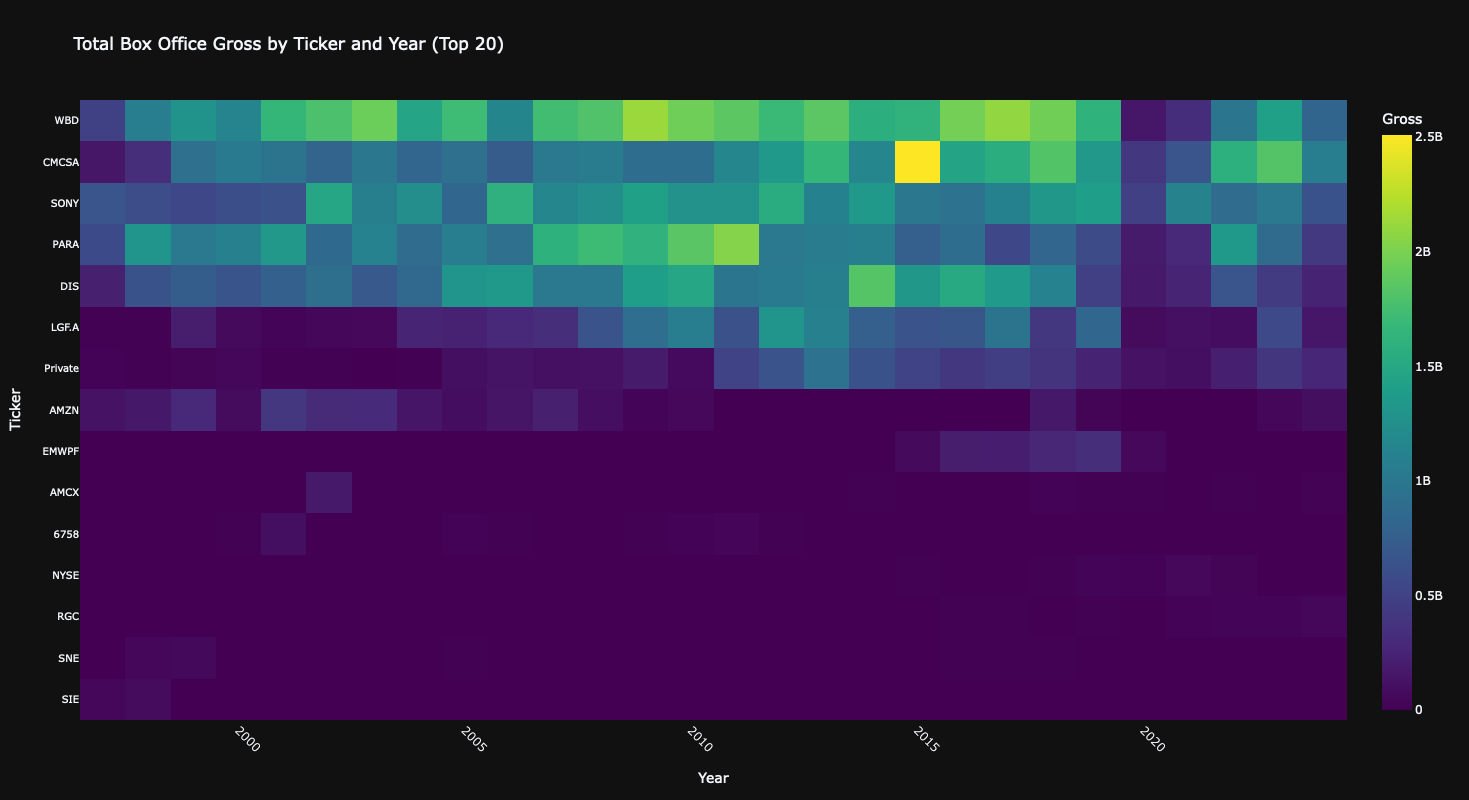

In [13]:
import pandas as pd
import plotly.express as px
import numpy as np
import plotly.graph_objects as go

df = df_movies.copy()
# Extract the year from the 'date' column
df = df.dropna(subset=["date"])
df['year'] = df['date'].dt.year

# Group by ticker and year, summing the gross
df_heatmap = df.groupby(['ticker', 'year'])['gross'].sum().reset_index()

# Replace NaN and infinite values with 0
df_heatmap['gross'] = df_heatmap['gross'].replace([np.inf, -np.inf, np.nan], 0)

# Group by ticker and sum the total gross
df_ticker_total = df_heatmap.groupby('ticker')['gross'].sum().reset_index()

# Sort the tickers by total gross in descending order
sorted_tickers = df_ticker_total.sort_values('gross', ascending=False)['ticker'].tolist()

# Create the pivot table
pivot_data = df_heatmap.pivot(index='ticker', columns='year', values='gross')

# Fill NaN values with 0
pivot_data = pivot_data.fillna(0)

# Select top 20 tickers by total gross
top_15_tickers = df_ticker_total.nlargest(15, 'gross')['ticker'].tolist()

# Filter the pivot data for top 20 tickers
pivot_data_top20 = pivot_data.loc[top_15_tickers]

# Create the heatmap using Plotly Graph Objects for more customization
fig = go.Figure(data=go.Heatmap(
    z=pivot_data_top20.values,
    x=pivot_data_top20.columns,
    y=pivot_data_top20.index,
    colorscale='Viridis',
    colorbar=dict(title='Gross'),
    hovertemplate='Ticker: %{y}<br>Year: %{x}<br>Gross: $%{z:.2f}M<extra></extra>'
))

fig.update_layout(
    title='Total Box Office Gross by Ticker and Year (Top 20)',
    xaxis_title='Year',
    yaxis_title='Ticker',
    yaxis_autorange='reversed',
    height=800,
    template='plotly_dark',
    yaxis=dict(tickfont=dict(size=10)),
    xaxis=dict(tickangle=45),
)

fig.show()